<a href="https://colab.research.google.com/github/Naren8520/Seri-de-tiempo-con-Machine-Learning/blob/main/Time_Series_con_Plotly_en_Python.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

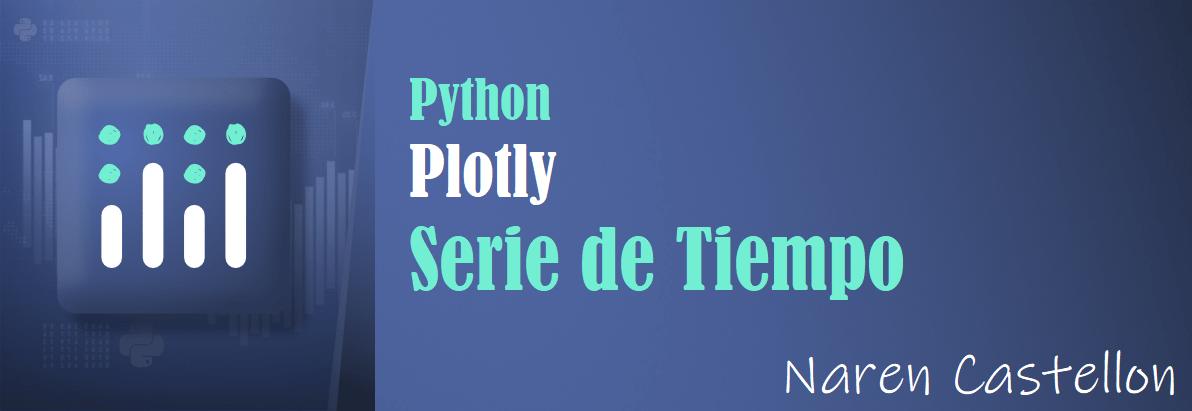

In [2]:
#@title
from IPython.display import Image
Image("/content/plotly_serie tiempo.png")

## Series tiempo mediante ejes de tipo Fechas
Las series temporales se pueden representar utilizando funciones u objetos gráficos. Podemos usar 
* gráficos de línea 
* dispersión o gráficos de barras.
* Gráfico de Caja

Para aplicaciones financieras, Plotly también se puede utilizar para crear Gráficos de velas y Gráficos OHLC, que por defecto datan ejes.

In [ ]:
# Usando plotly.express
import plotly.express as px

df = px.data.stocks()  
df.head()

date      GOOG      AAPL      AMZN        FB      NFLX      MSFT
0  2018-01-01  1.000000  1.000000  1.000000  1.000000  1.000000  1.000000
1  2018-01-08  1.018172  1.011943  1.061881  0.959968  1.053526  1.015988
2  2018-01-15  1.032008  1.019771  1.053240  0.970243  1.049860  1.020524
3  2018-01-22  1.066783  0.980057  1.140676  1.016858  1.307681  1.066561
4  2018-01-29  1.008773  0.917143  1.163374  1.018357  1.273537  1.040708

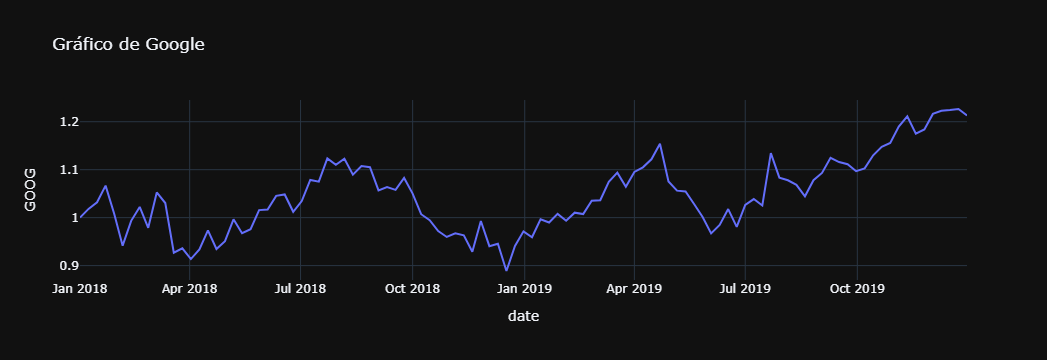

In [ ]:
import plotly.express as px
fig = px.line(df, x='date', y="GOOG",title="Gráfico de Google",template = "plotly_dark")
fig.show()

In [ ]:
# Usando graph_objects
import plotly.graph_objects as go

import pandas as pd
df = pd.read_csv('https://raw.githubusercontent.com/plotly/datasets/master/finance-charts-apple.csv')
df.head()

Date   AAPL.Open   AAPL.High    AAPL.Low  AAPL.Close  AAPL.Volume  \
0  2015-02-17  127.489998  128.880005  126.919998  127.830002     63152400   
1  2015-02-18  127.629997  128.779999  127.449997  128.720001     44891700   
2  2015-02-19  128.479996  129.029999  128.330002  128.449997     37362400   
3  2015-02-20  128.619995  129.500000  128.050003  129.500000     48948400   
4  2015-02-23  130.020004  133.000000  129.660004  133.000000     70974100   

   AAPL.Adjusted          dn        mavg          up   direction  
0     122.905254  106.741052  117.927667  129.114281  Increasing  
1     123.760965  107.842423  118.940333  130.038244  Increasing  
2     123.501363  108.894245  119.889167  130.884089  Decreasing  
3     124.510914  109.785449  120.763500  131.741551  Increasing  
4     127.876074  110.372516  121.720167  133.067817  Increasing

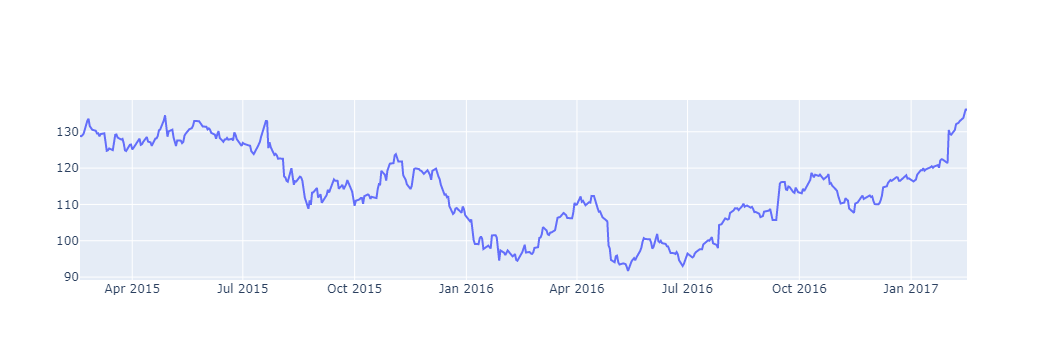

In [ ]:

fig = go.Figure([go.Scatter(x=df['Date'], y=df['AAPL.High'])] )
fig.show()

## Diferentes tipos de gráficos en ejes de fecha
Cualquier tipo de gráfico cartesiano se puede colocar en ejes, por ejemplo, este gráfico de barras de valores relativos de cotización bursátil.date

In [ ]:
import plotly.express as px

df = px.data.stocks(indexed=True)-1
df.head()

company         GOOG      AAPL      AMZN        FB      NFLX      MSFT
date                                                                  
2018-01-01  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000
2018-01-08  0.018172  0.011943  0.061881 -0.040032  0.053526  0.015988
2018-01-15  0.032008  0.019771  0.053240 -0.029757  0.049860  0.020524
2018-01-22  0.066783 -0.019943  0.140676  0.016858  0.307681  0.066561
2018-01-29  0.008773 -0.082857  0.163374  0.018357  0.273537  0.040708

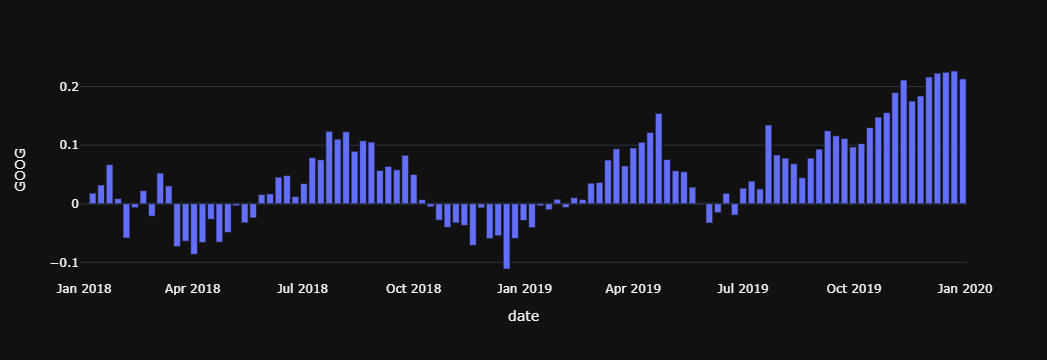

In [ ]:

fig = px.bar(df, x=df.index, y="GOOG", template = "plotly_dark")
fig.show()

Graficando diferentes gráficos

In [ ]:
import plotly.express as px

df = px.data.stocks(indexed=True)-1
df.head()

company         GOOG      AAPL      AMZN        FB      NFLX      MSFT
date                                                                  
2018-01-01  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000
2018-01-08  0.018172  0.011943  0.061881 -0.040032  0.053526  0.015988
2018-01-15  0.032008  0.019771  0.053240 -0.029757  0.049860  0.020524
2018-01-22  0.066783 -0.019943  0.140676  0.016858  0.307681  0.066561
2018-01-29  0.008773 -0.082857  0.163374  0.018357  0.273537  0.040708

El parametro `facet_col_wrap=2` divide el gráfico en la cantida de columna que se muestra

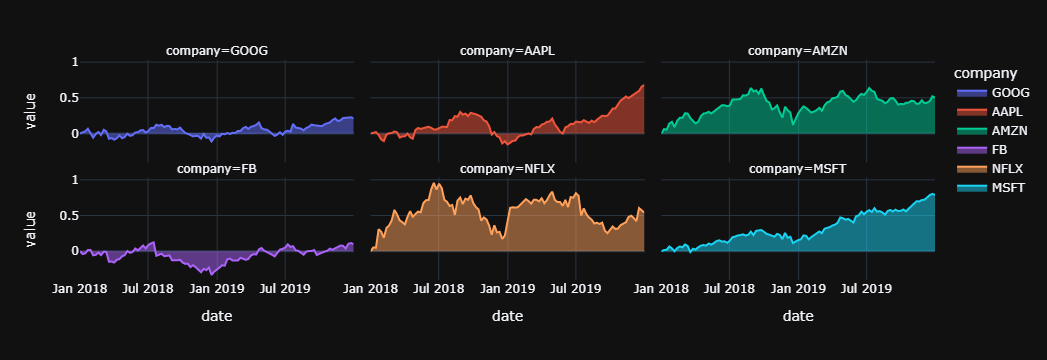

In [ ]:

fig = px.area(df, facet_col="company", facet_col_wrap=3,template = "plotly_dark")
fig.show()


## Configuración de etiquetas de tick
De forma predeterminada, las etiquetas de marca (y las marcas opcionales) están asociadas a una línea de cuadrícula específica y representan un instante en el tiempo, por ejemplo, "00:00 del 1 de febrero de 2018". Las etiquetas de tick se pueden formatear utilizando el atributo (que acepta el tickformatcadenas de formato de formato de tiempo d3) para mostrar solo el mes y el año, pero aún representan un instante por defecto, por lo que en la figura a continuación, el texto de la etiqueta "Febrero 2018" abarca parte del mes de enero y parte del mes de febrero. El atributo controla el espaciado entre líneas de cuadrícula, y la configuración significa "1 mes". Este atributo también acepta un número de milisegundos, que se pueden escalar hasta días multiplicando por .dtick"M1"24*60*60*1000

Las etiquetas de marca del eje de fecha tienen la propiedad especial de que cualquier parte después de la primera instancia de in aparecerá en una segunda línea solo una vez por valor único, como con los números de año en el ejemplo siguiente. Para que el número de año aparezca en cada etiqueta de marca, se debe usar en lugar de .'\n'tickformat'<br>''\n'

Tenga en cuenta que, de forma predeterminada, el formato de los valores de los valores X e Y en la etiqueta flotante coincide con el de las etiquetas de marca de los ejes correspondientes, por lo que al personalizar las etiquetas de marca a algo amplio como "mes", generalmente es necesario personalizar la etiqueta flotante a algo más estrecho como la fecha real, como se muestra a continuación.

In [ ]:
import plotly.express as px
df = px.data.stocks()
df.head()

date      GOOG      AAPL      AMZN        FB      NFLX      MSFT
0  2018-01-01  1.000000  1.000000  1.000000  1.000000  1.000000  1.000000
1  2018-01-08  1.018172  1.011943  1.061881  0.959968  1.053526  1.015988
2  2018-01-15  1.032008  1.019771  1.053240  0.970243  1.049860  1.020524
3  2018-01-22  1.066783  0.980057  1.140676  1.016858  1.307681  1.066561
4  2018-01-29  1.008773  0.917143  1.163374  1.018357  1.273537  1.040708

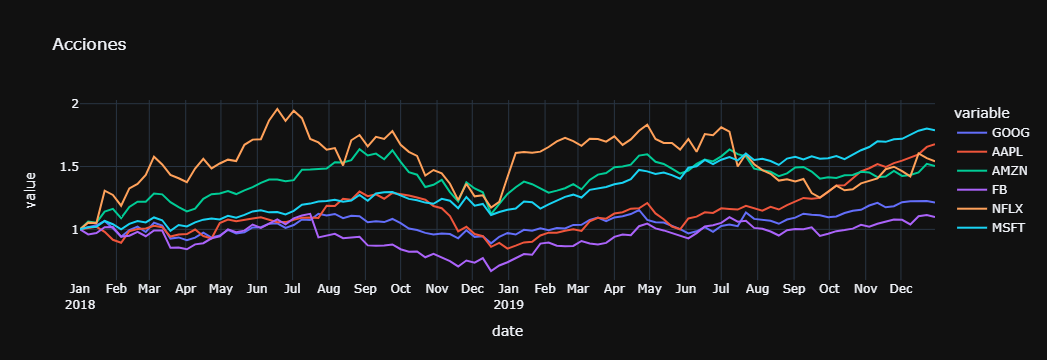

In [ ]:

fig = px.line(df, x="date", y=df.columns,
              hover_data={"date": "|%B %d, %Y"},
              title='Acciones',template = "plotly_dark")
fig.update_xaxes(
    dtick="M1",
    tickformat="%b\n%Y")
fig.show()

## Mover las etiquetas a la mitad del período


Al establecer el atributo en (el valor predeterminado es ) podemos mover las etiquetas de marca a la mitad del período que representan. Las líneas de cuadrícula permanecen al comienzo de cada mes (gracias a ), pero las etiquetas ahora abarcan el mes al que se refieren.ticklabelmode"period""instant"dtick="M1"

In [ ]:
import plotly.express as px
df = px.data.stocks()
df.head()

date      GOOG      AAPL      AMZN        FB      NFLX      MSFT
0  2018-01-01  1.000000  1.000000  1.000000  1.000000  1.000000  1.000000
1  2018-01-08  1.018172  1.011943  1.061881  0.959968  1.053526  1.015988
2  2018-01-15  1.032008  1.019771  1.053240  0.970243  1.049860  1.020524
3  2018-01-22  1.066783  0.980057  1.140676  1.016858  1.307681  1.066561
4  2018-01-29  1.008773  0.917143  1.163374  1.018357  1.273537  1.040708

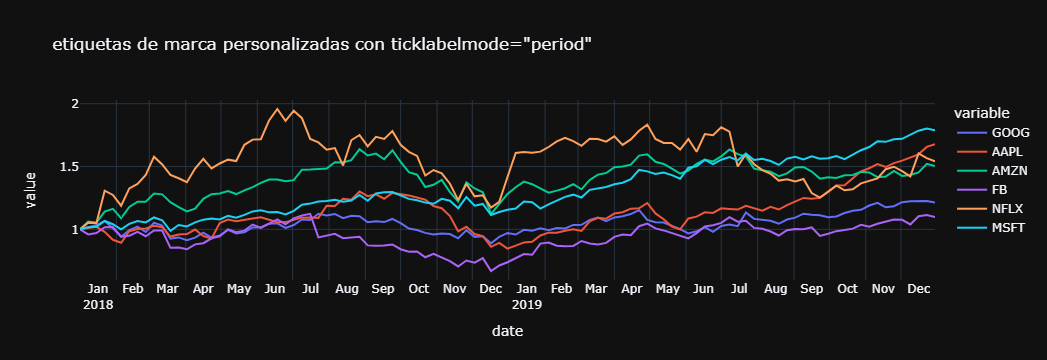

In [ ]:

fig = px.line(df, x="date", y=df.columns,
              hover_data={"date": "|%B %d, %Y"},template = "plotly_dark",
              title='etiquetas de marca personalizadas con ticklabelmode="period" ')
fig.update_xaxes(
    dtick="M1",
    tickformat="%b\n%Y",
    ticklabelmode="period")
fig.show()

## Resumen de datos de series temporales con histogramas
Argumento histogramas son potentes herramientas de agregación de datos que incluso funcionan en ejes de fecha. En la siguiente figura, pasamos los datos diarios y los mostramos como promedios mensuales configurando y `.histfunc="avgxbins_size="M1"`

In [ ]:
import plotly.express as px
import plotly.graph_objects as go
import pandas as pd

df = pd.read_csv('https://raw.githubusercontent.com/plotly/datasets/master/finance-charts-apple.csv')
df.head()

Date   AAPL.Open   AAPL.High    AAPL.Low  AAPL.Close  AAPL.Volume  \
0  2015-02-17  127.489998  128.880005  126.919998  127.830002     63152400   
1  2015-02-18  127.629997  128.779999  127.449997  128.720001     44891700   
2  2015-02-19  128.479996  129.029999  128.330002  128.449997     37362400   
3  2015-02-20  128.619995  129.500000  128.050003  129.500000     48948400   
4  2015-02-23  130.020004  133.000000  129.660004  133.000000     70974100   

   AAPL.Adjusted          dn        mavg          up   direction  
0     122.905254  106.741052  117.927667  129.114281  Increasing  
1     123.760965  107.842423  118.940333  130.038244  Increasing  
2     123.501363  108.894245  119.889167  130.884089  Decreasing  
3     124.510914  109.785449  120.763500  131.741551  Increasing  
4     127.876074  110.372516  121.720167  133.067817  Increasing

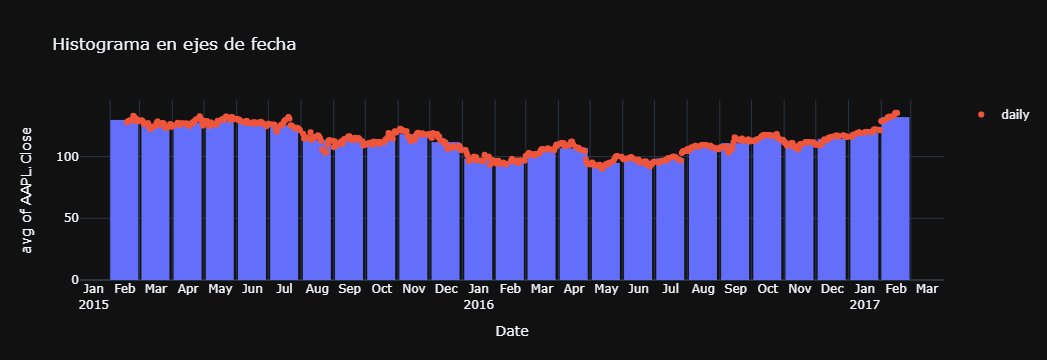

In [ ]:

fig = px.histogram(df, x="Date", y="AAPL.Close", histfunc="avg", title="Histograma en ejes de fecha",template = "plotly_dark")
fig.update_traces(xbins_size="M1")
fig.update_xaxes(showgrid=True, ticklabelmode="period", dtick="M1", tickformat="%b\n%Y")
fig.update_layout(bargap=0.1)
fig.add_trace(go.Scatter(mode="markers", x=df["Date"], y=df["AAPL.Close"], name="daily"))
fig.show();

## Visualización de datos de período

Si sus datos codificados "1 de enero" o "31 de enero" de hecho se refieren a datos recopilados a lo largo del mes de enero, por ejemplo, puede configurar sus rastros para que muestren sus marcas al final del inicio o a mediados de mes con los atributos y. En el siguiente ejemplo, todos los datos sin procesar se codifican con un valor X del 10 del mes, pero se agrupan en períodos mensuales con y luego se muestran al principio, medio y final del `período.xperiodxperiodalignmentxperiod="M1"`

In [ ]:
import plotly.graph_objects as go
import pandas as pd

df = pd.DataFrame(dict(
    date=["2020-01-10", "2020-02-10", "2020-03-10", "2020-04-10", "2020-05-10", "2020-06-10"],
    value=[1,2,3,1,2,3]
))
df.head()

date  value
0  2020-01-10      1
1  2020-02-10      2
2  2020-03-10      3
3  2020-04-10      1
4  2020-05-10      2

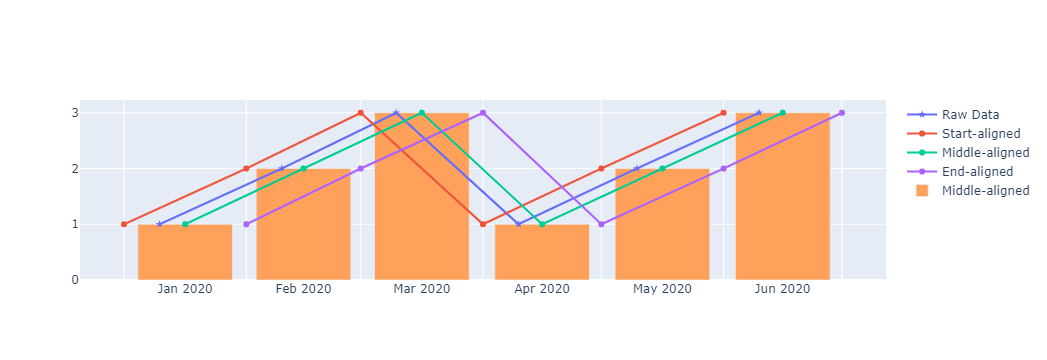

In [ ]:


fig = go.Figure()
fig.add_trace(go.Scatter(
    name="Raw Data",
    mode="markers+lines", x=df["date"], y=df["value"],
    marker_symbol="star"
))
fig.add_trace(go.Scatter(
    name="Start-aligned",
    mode="markers+lines", x=df["date"], y=df["value"],
    xperiod="M1",
    xperiodalignment="start"
))
fig.add_trace(go.Scatter(
    name="Middle-aligned",
    mode="markers+lines", x=df["date"], y=df["value"],
    xperiod="M1",
    xperiodalignment="middle"
))
fig.add_trace(go.Scatter(
    name="End-aligned",
    mode="markers+lines", x=df["date"], y=df["value"],
    xperiod="M1",
    xperiodalignment="end"
))
fig.add_trace(go.Bar(
    name="Middle-aligned",
    x=df["date"], y=df["value"],
    xperiod="M1",
    xperiodalignment="middle"
))
fig.update_xaxes(showgrid=True, ticklabelmode="period")
fig.show()

## Plantillas flotantes con mezclas de datos de período


Al mostrar datos periódicos con períodos de tamaño mixto (es decir, trimestrales y mensuales) junto con x o hovermodes y usando x unifiedhovertemplate, el atributo se puede usar para controlar cómo se muestra el valor X de cada período, y la directiva especial hover-template se puede usar para controlar cómo se muestra el valor X para los puntos que no comparten la coordenada X exacta con el punto sobre el que se está colocando. devolverá una cadena vacía cuando el valor X sea el que se está colocando sobre él, de lo contrario devolverá . El especial y las variaciones se mostrarán con espacios antes, después o alrededor de los paréntesis, respectivamente.xhoverformat%{xother}%{xother}(%{x})%{_xother}%{xother_}%{_xother_}

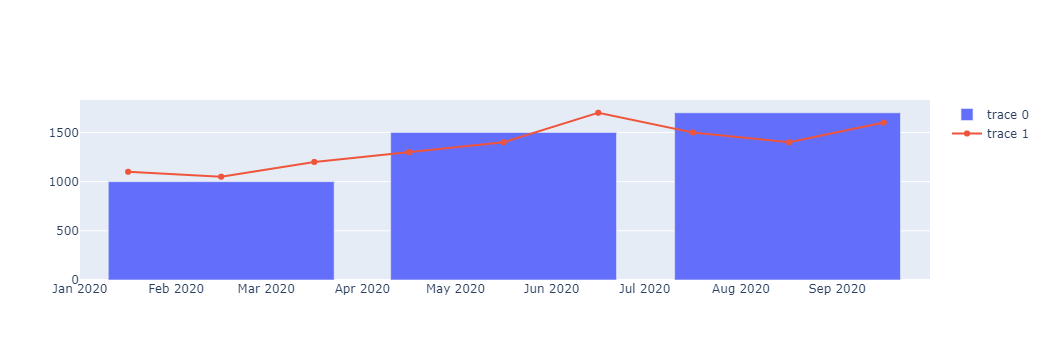

In [ ]:
import plotly.graph_objects as go

fig = go.Figure()

fig.add_trace(go.Bar(
    x=["2020-01-01", "2020-04-01", "2020-07-01"],
    y=[1000, 1500, 1700],
    xperiod="M3",
    xperiodalignment="middle",
    xhoverformat="Q%q",
    hovertemplate="%{y}%{_xother}"
))

fig.add_trace(go.Scatter(
    x=["2020-01-01", "2020-02-01", "2020-03-01",
      "2020-04-01", "2020-05-01", "2020-06-01",
      "2020-07-01", "2020-08-01", "2020-09-01"],
    y=[1100,1050,1200,1300,1400,1700,1500,1400,1600],
    xperiod="M1",
    xperiodalignment="middle",
    hovertemplate="%{y}%{_xother}"
))

fig.update_layout(hovermode="x unified")
fig.show()

## Trazado de series temporales con intervalo de fechas personalizado
El rango de datos se puede establecer manualmente mediante objetos o cadenas de fecha.datetime.datetime

In [ ]:
# Using plotly.express
import plotly.express as px

import pandas as pd
df = pd.read_csv('https://raw.githubusercontent.com/plotly/datasets/master/finance-charts-apple.csv')
df.head()

Date   AAPL.Open   AAPL.High    AAPL.Low  AAPL.Close  AAPL.Volume  \
0  2015-02-17  127.489998  128.880005  126.919998  127.830002     63152400   
1  2015-02-18  127.629997  128.779999  127.449997  128.720001     44891700   
2  2015-02-19  128.479996  129.029999  128.330002  128.449997     37362400   
3  2015-02-20  128.619995  129.500000  128.050003  129.500000     48948400   
4  2015-02-23  130.020004  133.000000  129.660004  133.000000     70974100   

   AAPL.Adjusted          dn        mavg          up   direction  
0     122.905254  106.741052  117.927667  129.114281  Increasing  
1     123.760965  107.842423  118.940333  130.038244  Increasing  
2     123.501363  108.894245  119.889167  130.884089  Decreasing  
3     124.510914  109.785449  120.763500  131.741551  Increasing  
4     127.876074  110.372516  121.720167  133.067817  Increasing

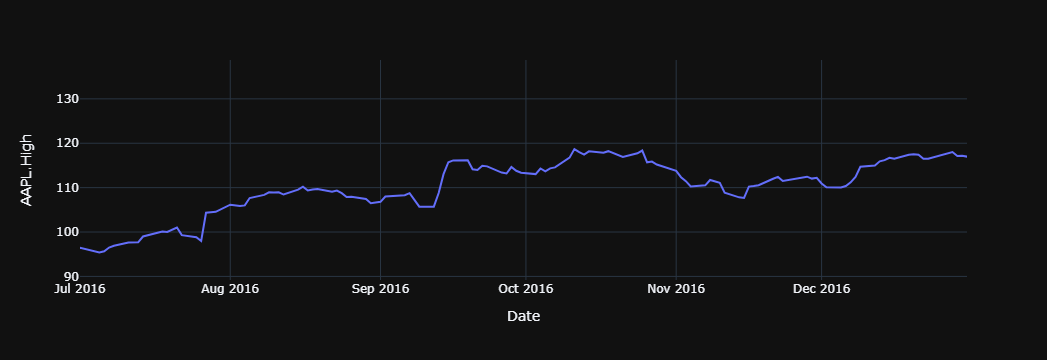

In [ ]:

fig = px.line(df, x='Date', y='AAPL.High', range_x=['2016-07-01','2016-12-31'],template = "plotly_dark")
fig.show()

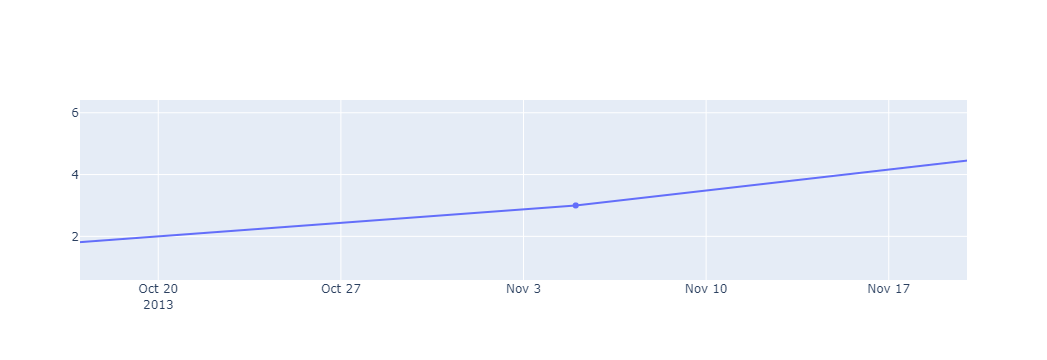

In [ ]:
# Using graph_objects

import plotly.graph_objects as go
import datetime

x = [datetime.datetime(year=2013, month=10, day=4),
     datetime.datetime(year=2013, month=11, day=5),
     datetime.datetime(year=2013, month=12, day=6)]

fig = go.Figure(data=[go.Scatter(x=x, y=[1, 3, 6])])
# Use datetime objects to set xaxis range
fig.update_layout(xaxis_range=[datetime.datetime(2013, 10, 17),
                               datetime.datetime(2013, 11, 20)])

fig.show()

In [ ]:
import plotly.graph_objects as go
import pandas as pd
df = pd.read_csv('https://raw.githubusercontent.com/plotly/datasets/master/finance-charts-apple.csv')
df.head()

Date   AAPL.Open   AAPL.High    AAPL.Low  AAPL.Close  AAPL.Volume  \
0  2015-02-17  127.489998  128.880005  126.919998  127.830002     63152400   
1  2015-02-18  127.629997  128.779999  127.449997  128.720001     44891700   
2  2015-02-19  128.479996  129.029999  128.330002  128.449997     37362400   
3  2015-02-20  128.619995  129.500000  128.050003  129.500000     48948400   
4  2015-02-23  130.020004  133.000000  129.660004  133.000000     70974100   

   AAPL.Adjusted          dn        mavg          up   direction  
0     122.905254  106.741052  117.927667  129.114281  Increasing  
1     123.760965  107.842423  118.940333  130.038244  Increasing  
2     123.501363  108.894245  119.889167  130.884089  Decreasing  
3     124.510914  109.785449  120.763500  131.741551  Increasing  
4     127.876074  110.372516  121.720167  133.067817  Increasing

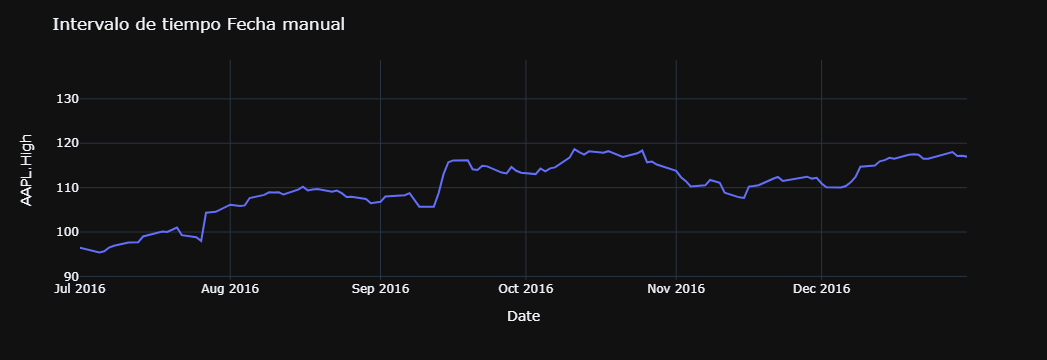

In [ ]:

fig = px.line(df, x='Date', y='AAPL.High',template = "plotly_dark")

# Use date string to set xaxis range
fig.update_layout(xaxis_range=['2016-07-01','2016-12-31'],
                  title_text="Intervalo de tiempo Fecha manual ")
fig.show()

## Series temporales con control deslizante de rango
Un control deslizante de rango es una pequeña área similar a una subtrama debajo de una gráfica que permite a los usuarios desplazarse y hacer zoom en el eje X mientras mantienen una visión general del gráfico. 

In [ ]:
import plotly.express as px
import pandas as pd

df = pd.read_csv('https://raw.githubusercontent.com/plotly/datasets/master/finance-charts-apple.csv')
df.head()

Date   AAPL.Open   AAPL.High    AAPL.Low  AAPL.Close  AAPL.Volume  \
0  2015-02-17  127.489998  128.880005  126.919998  127.830002     63152400   
1  2015-02-18  127.629997  128.779999  127.449997  128.720001     44891700   
2  2015-02-19  128.479996  129.029999  128.330002  128.449997     37362400   
3  2015-02-20  128.619995  129.500000  128.050003  129.500000     48948400   
4  2015-02-23  130.020004  133.000000  129.660004  133.000000     70974100   

   AAPL.Adjusted          dn        mavg          up   direction  
0     122.905254  106.741052  117.927667  129.114281  Increasing  
1     123.760965  107.842423  118.940333  130.038244  Increasing  
2     123.501363  108.894245  119.889167  130.884089  Decreasing  
3     124.510914  109.785449  120.763500  131.741551  Increasing  
4     127.876074  110.372516  121.720167  133.067817  Increasing

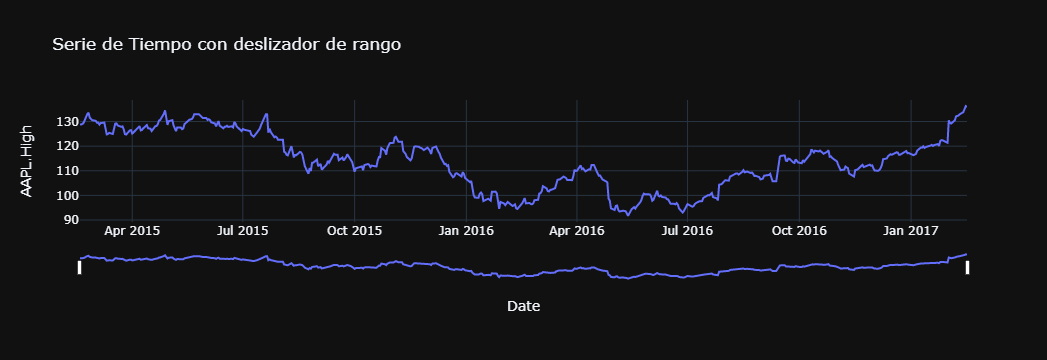

In [ ]:

fig = px.line(df, x='Date', y='AAPL.High', title='Serie de Tiempo con deslizador de rango',
              template = "plotly_dark")

fig.update_xaxes(rangeslider_visible=True)
fig.show()

## Series temporales con botones selectores de rango
Los botones selectores de rango son controles especiales que funcionan bien con series de tiempo y controles deslizantes de rango, y permiten a los usuarios establecer fácilmente el rango del eje X. 

In [ ]:
import plotly.express as px
import pandas as pd

df = pd.read_csv('https://raw.githubusercontent.com/plotly/datasets/master/finance-charts-apple.csv')
df.head()

Date   AAPL.Open   AAPL.High    AAPL.Low  AAPL.Close  AAPL.Volume  \
0  2015-02-17  127.489998  128.880005  126.919998  127.830002     63152400   
1  2015-02-18  127.629997  128.779999  127.449997  128.720001     44891700   
2  2015-02-19  128.479996  129.029999  128.330002  128.449997     37362400   
3  2015-02-20  128.619995  129.500000  128.050003  129.500000     48948400   
4  2015-02-23  130.020004  133.000000  129.660004  133.000000     70974100   

   AAPL.Adjusted          dn        mavg          up   direction  
0     122.905254  106.741052  117.927667  129.114281  Increasing  
1     123.760965  107.842423  118.940333  130.038244  Increasing  
2     123.501363  108.894245  119.889167  130.884089  Decreasing  
3     124.510914  109.785449  120.763500  131.741551  Increasing  
4     127.876074  110.372516  121.720167  133.067817  Increasing

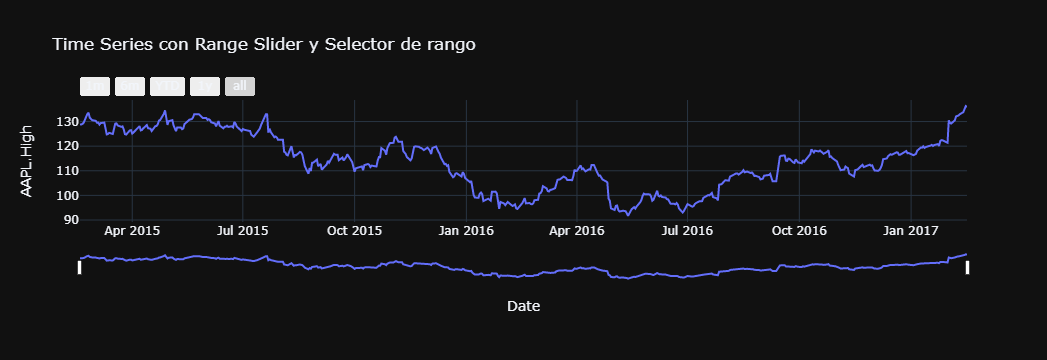

In [ ]:

fig = px.line(df, x='Date', y='AAPL.High', title='Time Series con Range Slider y Selector de rango',
             template = "plotly_dark")

fig.update_xaxes(
    rangeslider_visible=True,
    rangeselector=dict(
        buttons=list([
            dict(count=1, label="1m", step="month", stepmode="backward"),
            dict(count=6, label="6m", step="month", stepmode="backward"),
            dict(count=1, label="YTD", step="year", stepmode="todate"),
            dict(count=1, label="1y", step="year", stepmode="backward"),
            dict(step="all")
        ])
    )
)
fig.show()

## Personalización del formato de etiqueta de tick por nivel de zoom
El atributo se puede utilizar para personalizar el formato de las etiquetas de tick en función del nivel de zoom. Intente acercar el gráfico a continuación y vea cómo cambia el formato de la etiqueta de marca. 

In [ ]:
import plotly.graph_objects as go
import pandas as pd

df = pd.read_csv('https://raw.githubusercontent.com/plotly/datasets/master/finance-charts-apple.csv')
df.head()

Date   AAPL.Open   AAPL.High    AAPL.Low  AAPL.Close  AAPL.Volume  \
0  2015-02-17  127.489998  128.880005  126.919998  127.830002     63152400   
1  2015-02-18  127.629997  128.779999  127.449997  128.720001     44891700   
2  2015-02-19  128.479996  129.029999  128.330002  128.449997     37362400   
3  2015-02-20  128.619995  129.500000  128.050003  129.500000     48948400   
4  2015-02-23  130.020004  133.000000  129.660004  133.000000     70974100   

   AAPL.Adjusted          dn        mavg          up   direction  
0     122.905254  106.741052  117.927667  129.114281  Increasing  
1     123.760965  107.842423  118.940333  130.038244  Increasing  
2     123.501363  108.894245  119.889167  130.884089  Decreasing  
3     124.510914  109.785449  120.763500  131.741551  Increasing  
4     127.876074  110.372516  121.720167  133.067817  Increasing

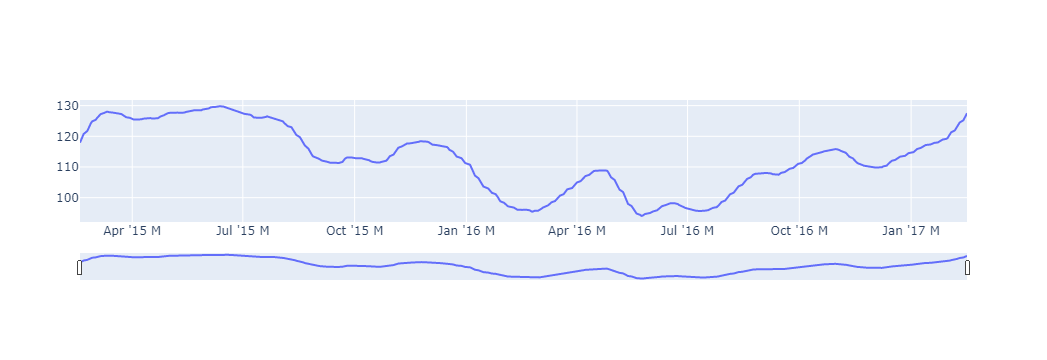

In [ ]:

fig = go.Figure(go.Scatter(
    x = df['Date'],
    y = df['mavg']
))

fig.update_xaxes(
    rangeslider_visible=True,
    tickformatstops = [
        dict(dtickrange=[None, 1000], value="%H:%M:%S.%L ms"),
        dict(dtickrange=[1000, 60000], value="%H:%M:%S s"),
        dict(dtickrange=[60000, 3600000], value="%H:%M m"),
        dict(dtickrange=[3600000, 86400000], value="%H:%M h"),
        dict(dtickrange=[86400000, 604800000], value="%e. %b d"),
        dict(dtickrange=[604800000, "M1"], value="%e. %b w"),
        dict(dtickrange=["M1", "M12"], value="%b '%y M"),
        dict(dtickrange=["M12", None], value="%Y Y")
    ]
)

fig.show()

 ## Ocultar fines de semana y días festivos
El atributo disponible en los ejes x e y de tipo se puede utilizar para ocultar ciertos períodos de tiempo. En el siguiente ejemplo, mostramos dos gráficos: uno en modo predeterminado para mostrar brechas en los datos, y otro donde ocultamos fines de semana y días festivos para mostrar un historial de operaciones ininterrumpido. Tenga en cuenta las brechas más pequeñas entre las líneas de la cuadrícula para el 21 de diciembre y el 4 de enero, donde se eliminaron los días festivos.

In [ ]:
import plotly.express as px
import pandas as pd

df = pd.read_csv('https://raw.githubusercontent.com/plotly/datasets/master/finance-charts-apple.csv')
df.head()

Date   AAPL.Open   AAPL.High    AAPL.Low  AAPL.Close  AAPL.Volume  \
0  2015-02-17  127.489998  128.880005  126.919998  127.830002     63152400   
1  2015-02-18  127.629997  128.779999  127.449997  128.720001     44891700   
2  2015-02-19  128.479996  129.029999  128.330002  128.449997     37362400   
3  2015-02-20  128.619995  129.500000  128.050003  129.500000     48948400   
4  2015-02-23  130.020004  133.000000  129.660004  133.000000     70974100   

   AAPL.Adjusted          dn        mavg          up   direction  
0     122.905254  106.741052  117.927667  129.114281  Increasing  
1     123.760965  107.842423  118.940333  130.038244  Increasing  
2     123.501363  108.894245  119.889167  130.884089  Decreasing  
3     124.510914  109.785449  120.763500  131.741551  Increasing  
4     127.876074  110.372516  121.720167  133.067817  Increasing

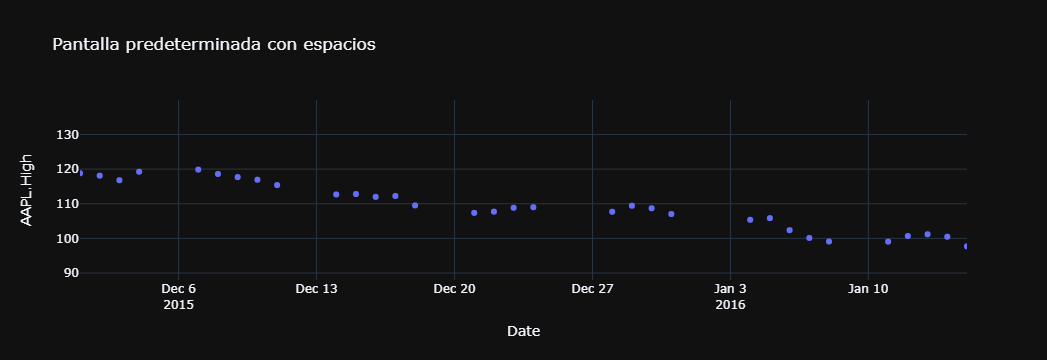

In [ ]:

fig = px.scatter(df, x='Date', y='AAPL.High', range_x=['2015-12-01', '2016-01-15'],
                 title=" Pantalla predeterminada con espacios",template = "plotly_dark")
fig.show()

In [ ]:
import plotly.express as px
import pandas as pd

df = pd.read_csv('https://raw.githubusercontent.com/plotly/datasets/master/finance-charts-apple.csv')
df.head()

Date   AAPL.Open   AAPL.High    AAPL.Low  AAPL.Close  AAPL.Volume  \
0  2015-02-17  127.489998  128.880005  126.919998  127.830002     63152400   
1  2015-02-18  127.629997  128.779999  127.449997  128.720001     44891700   
2  2015-02-19  128.479996  129.029999  128.330002  128.449997     37362400   
3  2015-02-20  128.619995  129.500000  128.050003  129.500000     48948400   
4  2015-02-23  130.020004  133.000000  129.660004  133.000000     70974100   

   AAPL.Adjusted          dn        mavg          up   direction  
0     122.905254  106.741052  117.927667  129.114281  Increasing  
1     123.760965  107.842423  118.940333  130.038244  Increasing  
2     123.501363  108.894245  119.889167  130.884089  Decreasing  
3     124.510914  109.785449  120.763500  131.741551  Increasing  
4     127.876074  110.372516  121.720167  133.067817  Increasing

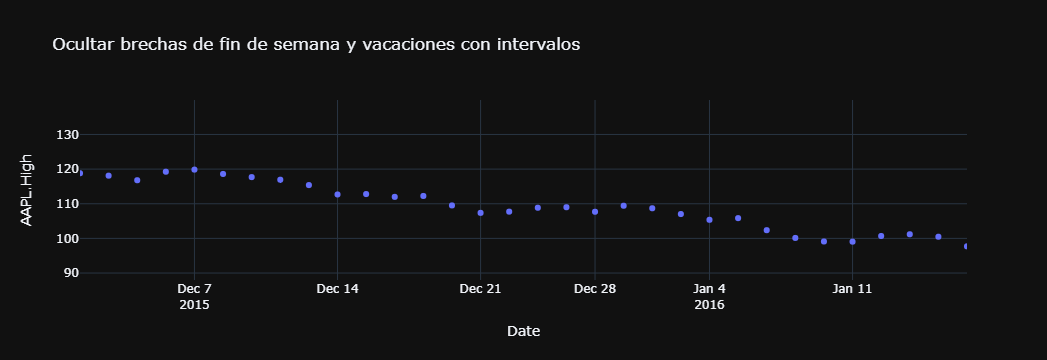

In [ ]:

fig = px.scatter(df, x='Date', y='AAPL.High', range_x=['2015-12-01', '2016-01-15'],
                 title="Ocultar brechas de fin de semana y vacaciones con intervalos",template = "plotly_dark")
fig.update_xaxes(
    rangebreaks=[
        dict(bounds=["sat", "mon"]), #hide weekends
        dict(values=["2015-12-25", "2016-01-01"])  # hide Christmas and New Year's
    ]
)
fig.show()

## Ocultar horarios no comerciales
La función descrita anteriormente también funciona para ocultar períodos por hora.rangebreaks

In [ ]:
import plotly.express as px
import pandas as pd
import numpy as np
np.random.seed(1)

work_week_40h = pd.date_range(start='2020-03-01', end='2020-03-07', freq="BH")

df = pd.DataFrame(dict(
    date = work_week_40h,
    value = np.cumsum(np.random.rand(40)-0.5)
))
df.head()

date     value
0 2020-03-02 09:00:00 -0.082978
1 2020-03-02 10:00:00  0.137346
2 2020-03-02 11:00:00 -0.362539
3 2020-03-02 12:00:00 -0.560207
4 2020-03-02 13:00:00 -0.913451

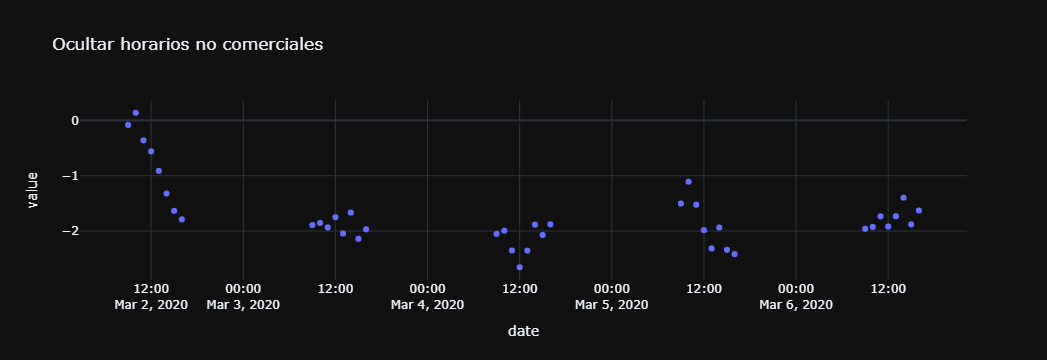

In [ ]:


fig = px.scatter(df, x="date", y="value",
                 title="Ocultar horarios no comerciales",template = "plotly_dark")
fig.show()

In [ ]:
import plotly.express as px
import pandas as pd
import numpy as np
np.random.seed(1)

work_week_40h = pd.date_range(start='2020-03-01', end='2020-03-07', freq="BH")

df = pd.DataFrame(dict(
    date = work_week_40h,
    value = np.cumsum(np.random.rand(40)-0.5)
))
df.head()

date     value
0 2020-03-02 09:00:00 -0.082978
1 2020-03-02 10:00:00  0.137346
2 2020-03-02 11:00:00 -0.362539
3 2020-03-02 12:00:00 -0.560207
4 2020-03-02 13:00:00 -0.913451

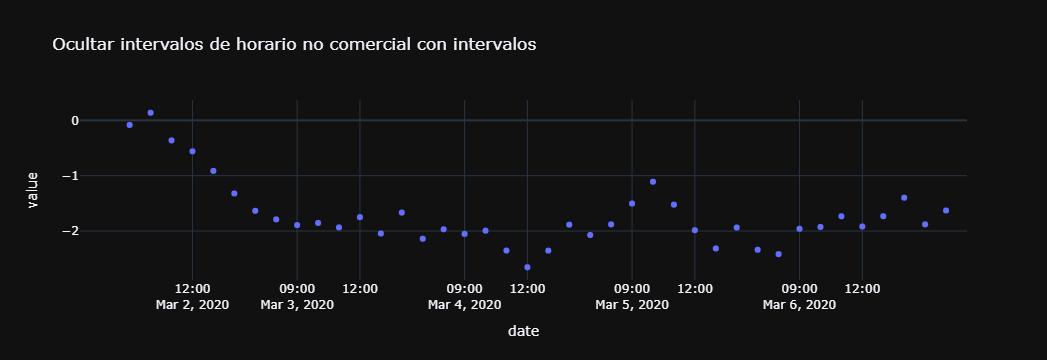

In [ ]:


fig = px.scatter(df, x="date", y="value",
                 title="Ocultar intervalos de horario no comercial con intervalos",template = "plotly_dark")
fig.update_xaxes(
    rangebreaks=[
        dict(bounds=[17, 9], pattern="hour"), # horas ocultas fuera de las 9 a. m. a las 5 p. m.
    ]
)
fig.show()

# Gráficos OHLC
El OHLC gráfico (para abrir, alto, bajo y cerrar) es un estilo de gráfico financiero que describe los valores abiertos, altos, bajos y cerrados para una coordenada dada (tiempo más probable). La punta de las líneas representa los valores y y los segmentos horizontales representan los valores y. Los puntos de muestra donde el valor de cierre es más alto (más bajo) que el valor abierto se denominan aumento (disminución). De forma predeterminada, los elementos crecientes se dibujan en verde, mientras que los elementos decrecientes se dibujan en rojo.

## Gráfico simple

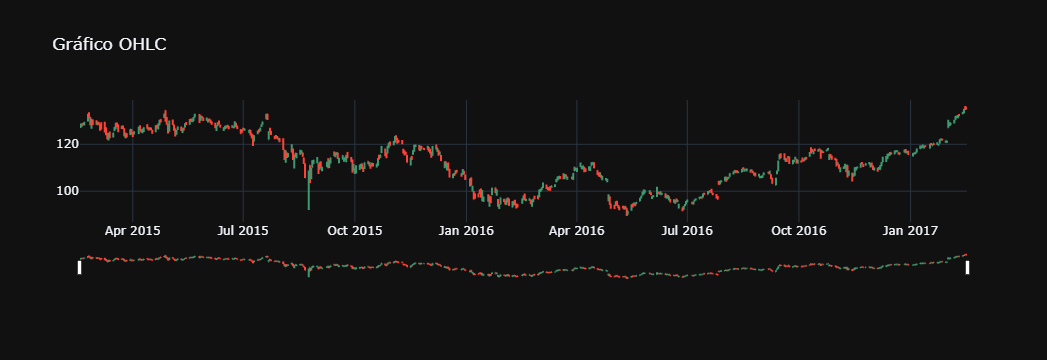

In [ ]:
import plotly.graph_objects as go
import pandas as pd

df = pd.read_csv('https://raw.githubusercontent.com/plotly/datasets/master/finance-charts-apple.csv')

fig = go.Figure(data=go.Ohlc(x=df['Date'],
                    open=df['AAPL.Open'],
                    high=df['AAPL.High'],
                    low=df['AAPL.Low'],
                    close=df['AAPL.Close']))
fig.update_layout(template="plotly_dark", title="Gráfico OHLC")
fig.show()

## Gráfico OHLC sin Rangeslider

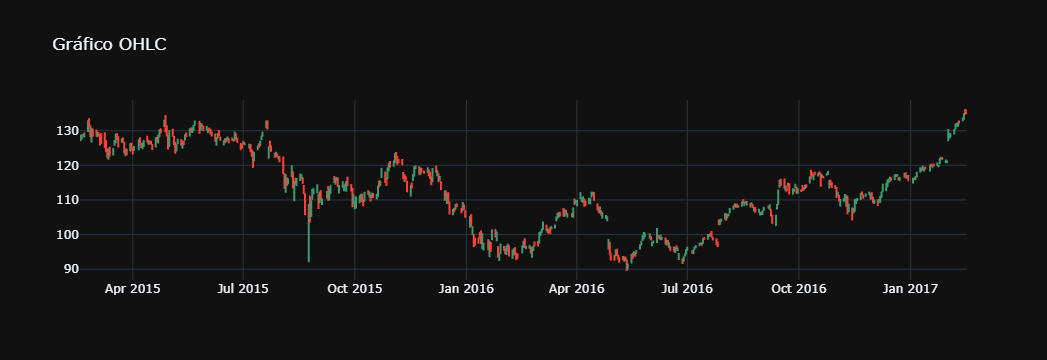

In [ ]:
import plotly.graph_objects as go

import pandas as pd


df = pd.read_csv('https://raw.githubusercontent.com/plotly/datasets/master/finance-charts-apple.csv')

fig = go.Figure(data=go.Ohlc(x=df['Date'],
                open=df['AAPL.Open'],
                high=df['AAPL.High'],
                low=df['AAPL.Low'],
                close=df['AAPL.Close']))
fig.update(layout_xaxis_rangeslider_visible=False)
fig.update_layout(template="plotly_dark", title="Gráfico OHLC")
fig.show()

## Agregar texto personalizado y anotaciones

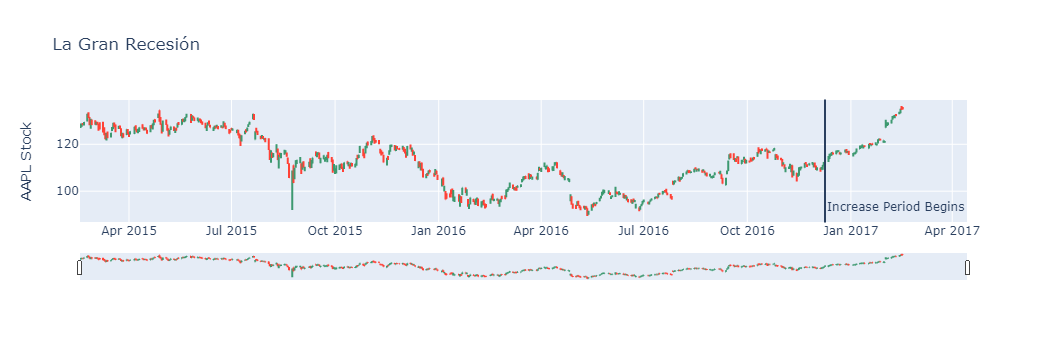

In [ ]:
import plotly.graph_objects as go
import pandas as pd

df = pd.read_csv('https://raw.githubusercontent.com/plotly/datasets/master/finance-charts-apple.csv')

fig = go.Figure(data=go.Ohlc(x=df['Date'],
                open=df['AAPL.Open'],
                high=df['AAPL.High'],
                low=df['AAPL.Low'],
                close=df['AAPL.Close']))

fig.update_layout(
    title='La Gran Recesión',
    yaxis_title='AAPL Stock',
    shapes = [dict(
        x0='2016-12-09', x1='2016-12-09', y0=0, y1=1, xref='x', yref='paper',
        line_width=2)],
    annotations=[dict(
        x='2016-12-09', y=0.05, xref='x', yref='paper',
        showarrow=False, xanchor='left', text='Increase Period Begins')]
)

fig.show()

## Colores OHLC personalizados

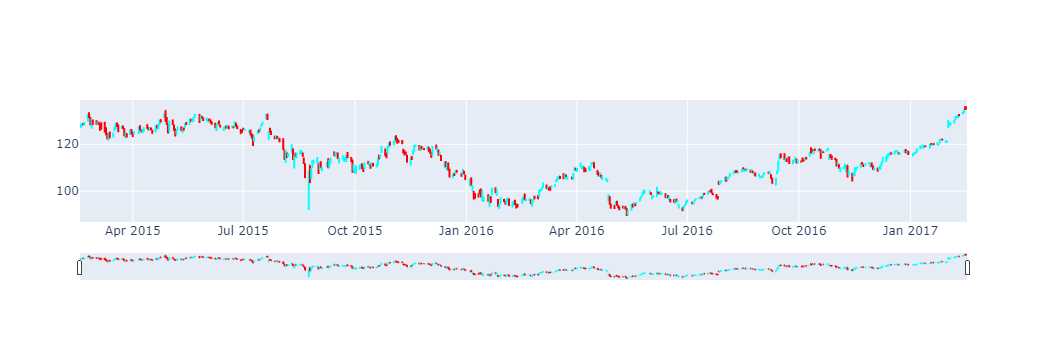

In [ ]:
import plotly.graph_objects as go
import pandas as pd

df = pd.read_csv('https://raw.githubusercontent.com/plotly/datasets/master/finance-charts-apple.csv')

fig = go.Figure(data=[go.Ohlc(
    x=df['Date'],
    open=df['AAPL.Open'], high=df['AAPL.High'],
    low=df['AAPL.Low'], close=df['AAPL.Close'],
    increasing_line_color= 'cyan', decreasing_line_color= 'red'
)])
fig.show()

## OHLC simple con objetos datetime

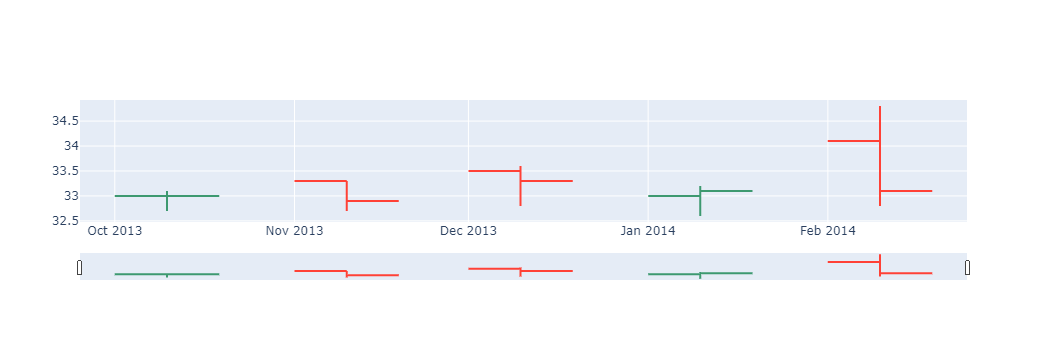

In [ ]:
import plotly.graph_objects as go

from datetime import datetime

open_data = [33.0, 33.3, 33.5, 33.0, 34.1]
high_data = [33.1, 33.3, 33.6, 33.2, 34.8]
low_data = [32.7, 32.7, 32.8, 32.6, 32.8]
close_data = [33.0, 32.9, 33.3, 33.1, 33.1]
dates = [datetime(year=2013, month=10, day=10),
         datetime(year=2013, month=11, day=10),
         datetime(year=2013, month=12, day=10),
         datetime(year=2014, month=1, day=10),
         datetime(year=2014, month=2, day=10)]

fig = go.Figure(data=[go.Ohlc(x=dates,
                          open=open_data, high=high_data,
                          low=low_data, close=close_data)])
fig.show()

## Hovertext personalizado

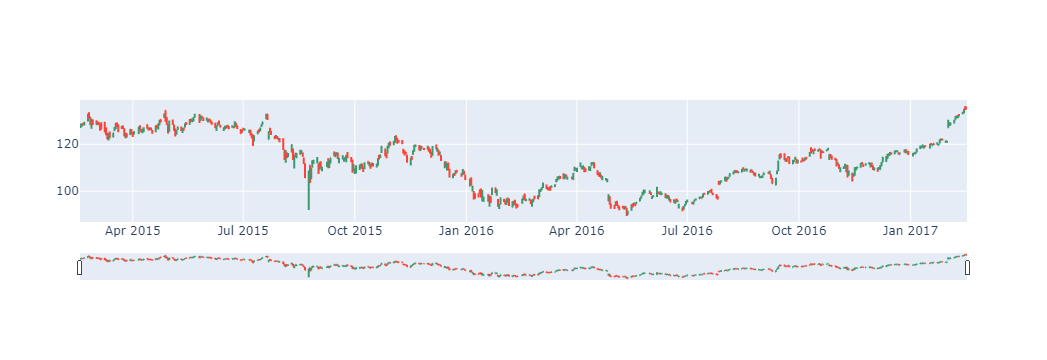

In [ ]:
import plotly.graph_objects as go

import pandas as pd
from datetime import datetime

hovertext=[]
for i in range(len(df['AAPL.Open'])):
    hovertext.append('Open: '+str(df['AAPL.Open'][i])+'<br>Close: '+str(df['AAPL.Close'][i]))

df = pd.read_csv('https://raw.githubusercontent.com/plotly/datasets/master/finance-charts-apple.csv')

fig = go.Figure(data=go.Ohlc(x=df['Date'],
                open=df['AAPL.Open'],
                high=df['AAPL.High'],
                low=df['AAPL.Low'],
                close=df['AAPL.Close'],
                text=hovertext,
                hoverinfo='text'))
fig.show()

# Gráfico de Candela o Velas
El gráfico de velas es un estilo de gráfico financiero que describe abierto, alto, bajo y cerrado para una coordenada dada (tiempo más probable). Los cuadros representan el diferencial entre los valores y y las líneas representan el diferencial entre los valores y. Los puntos de muestra donde el valor de cierre es más alto (más bajo) que el valor abierto se denominan aumento (disminución). De forma predeterminada, las velas crecientes se dibujan en verde, mientras que las decrecientes se dibujan en rojo

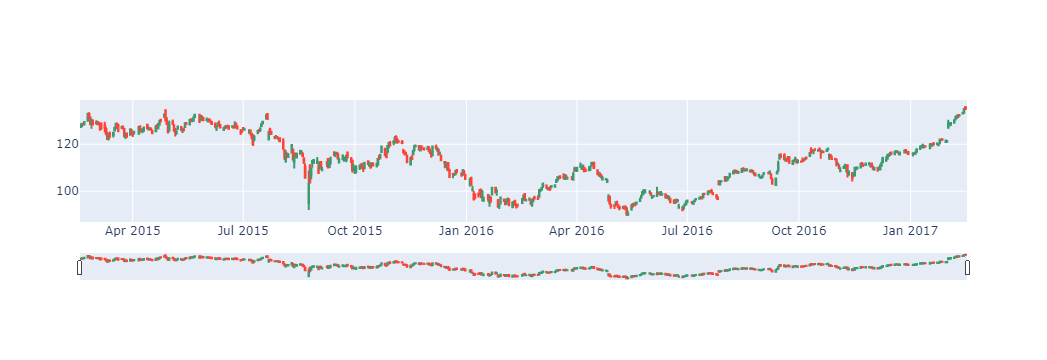

In [ ]:
import plotly.graph_objects as go

import pandas as pd
from datetime import datetime

df = pd.read_csv('https://raw.githubusercontent.com/plotly/datasets/master/finance-charts-apple.csv')

fig = go.Figure(data=[go.Candlestick(x=df['Date'],
                open=df['AAPL.Open'],
                high=df['AAPL.High'],
                low=df['AAPL.Low'],
                close=df['AAPL.Close'])])

fig.show()

## Vela sin Rangeslider

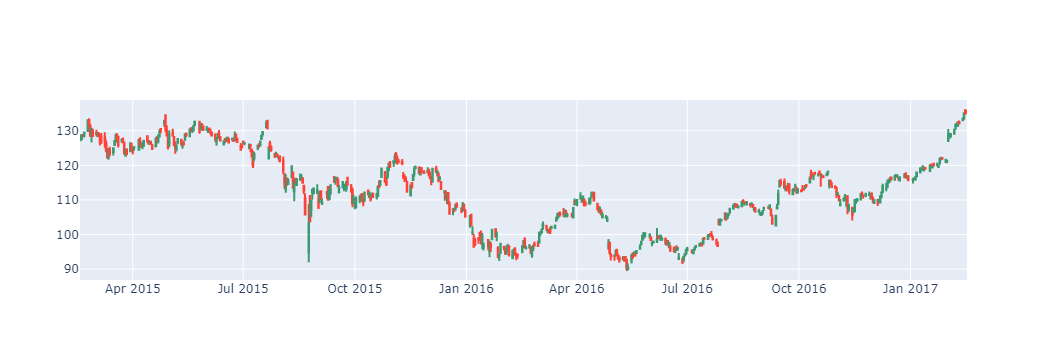

In [ ]:
import plotly.graph_objects as go
import pandas as pd

df = pd.read_csv('https://raw.githubusercontent.com/plotly/datasets/master/finance-charts-apple.csv')

fig = go.Figure(data=[go.Candlestick(x=df['Date'],
                open=df['AAPL.Open'], high=df['AAPL.High'],
                low=df['AAPL.Low'], close=df['AAPL.Close'])
                     ])

fig.update_layout(xaxis_rangeslider_visible=False)
fig.show()

## Agregar texto personalizado y anotaciones

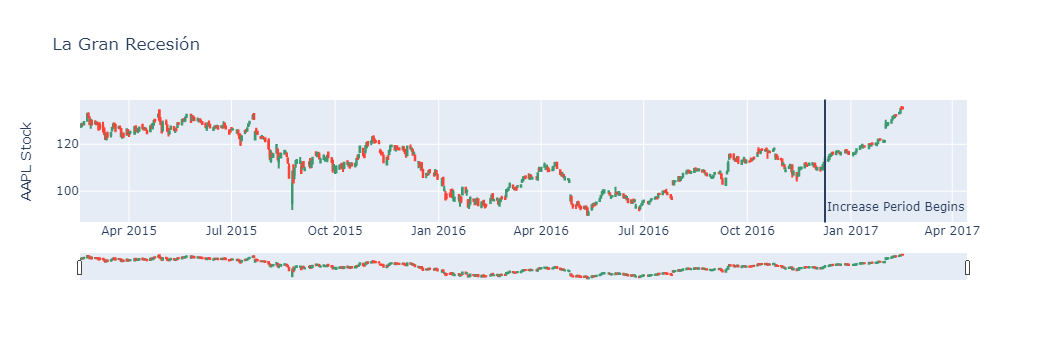

In [ ]:
import plotly.graph_objects as go
import pandas as pd


df = pd.read_csv('https://raw.githubusercontent.com/plotly/datasets/master/finance-charts-apple.csv')

fig = go.Figure(data=[go.Candlestick(x=df['Date'],
                open=df['AAPL.Open'], high=df['AAPL.High'],
                low=df['AAPL.Low'], close=df['AAPL.Close'])
                      ])

fig.update_layout(
    title='La Gran Recesión',
    yaxis_title='AAPL Stock',
    shapes = [dict(
        x0='2016-12-09', x1='2016-12-09', y0=0, y1=1, xref='x', yref='paper',
        line_width=2)],
    annotations=[dict(
        x='2016-12-09', y=0.05, xref='x', yref='paper',
        showarrow=False, xanchor='left', text='Increase Period Begins')]
)

fig.show()

## Colores de velas personalizados

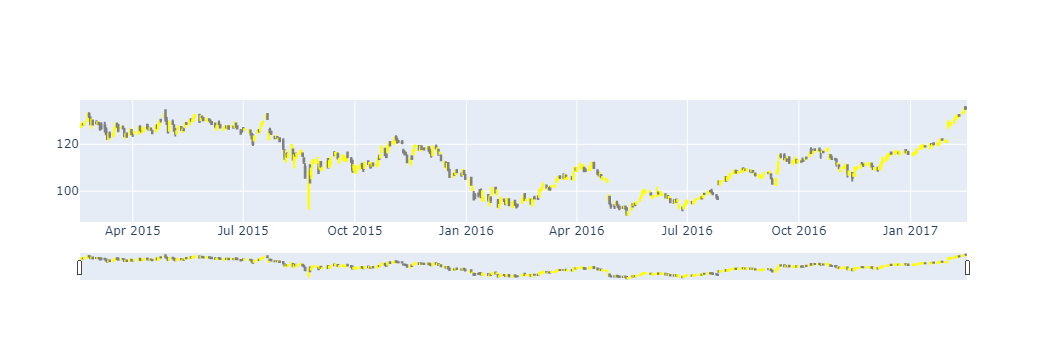

In [ ]:
import plotly.graph_objects as go
import pandas as pd

df = pd.read_csv('https://raw.githubusercontent.com/plotly/datasets/master/finance-charts-apple.csv')

fig = go.Figure(data=[go.Candlestick(
    x=df['Date'],
    open=df['AAPL.Open'], high=df['AAPL.High'],
    low=df['AAPL.Low'], close=df['AAPL.Close'],
    increasing_line_color= 'yellow', decreasing_line_color= 'gray'
)])

fig.show()

## Ejemplo simple con objetos datetime

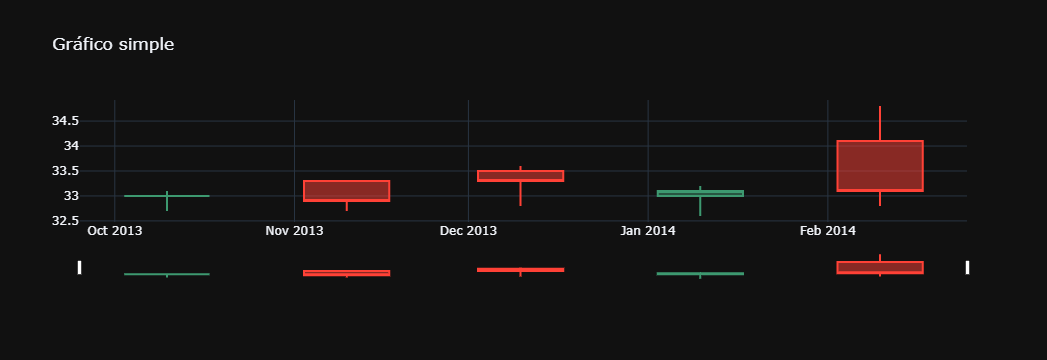

In [ ]:
import plotly.graph_objects as go
from datetime import datetime
import plotly.io as pio
pio.templates

open_data = [33.0, 33.3, 33.5, 33.0, 34.1]
high_data = [33.1, 33.3, 33.6, 33.2, 34.8]
low_data = [32.7, 32.7, 32.8, 32.6, 32.8]
close_data = [33.0, 32.9, 33.3, 33.1, 33.1]
dates = [datetime(year=2013, month=10, day=10),
         datetime(year=2013, month=11, day=10),
         datetime(year=2013, month=12, day=10),
         datetime(year=2014, month=1, day=10),
         datetime(year=2014, month=2, day=10)]

fig = go.Figure(data=[go.Candlestick(x=dates, 
                       open=open_data, high=high_data,
                       low=low_data, close=close_data)])
fig.update_layout(template="plotly_dark", title="Gráfico simple")
fig.show()